# **Backgammon MCTS/NN** 

## Resources:
[Rules of Backgammon](https://www.fgbradleys.com/rules/Backgammon_Rules.pdf)

[Covers the way of calculating nodes for MCTS in a game of chance](https://arxiv.org/pdf/0909.0801.pdf) (Chapter 4)

[Brief summary of TD-Gammon](http://satirist.org/learn-game/systems/gammon/td-gammon.html)


In [8]:
from pMCTS import *
from heuristic import *
from board_display import *
from matplotlib.animation import FuncAnimation

In [2]:
def play():

    board = starting_board() # find the starting board
    first_turn = True # it is the first_turn
    white_turn = True # we assume white starts but this can be changed later
    while not game_over(board): # while the game isn't over keep playing
        # White turn (AI)
        rolls = roll(first_turn) # find the rolls
        first_turn = False # it can't be the first roll after a roll
        print_rolls(rolls) # print the rolls
        print(BoardPrinter(board)) # print the board

        if white_turn: # computer_turn
            legal_moves = full_step(board, rolls)
            if len(legal_moves) > 1 or legal_moves[0][1] != "No possible moves":  # there are legal moves
                print("Thinking...")
                best_move = pUCT(board, rolls, legal_moves, 5) # finds the best move
                board = best_move[0] # the board is the best move according to the computer
                print(best_move[1])
                print()
            else: # if they're no moves, then it gets skipped
                print("White has no legal moves; skipping turn...")
                board[WHITE_TURN] = not board[WHITE_TURN]

        else: # human_turn

            legal_moves = full_step(board, rolls) # find all the moves they can do
            if len(legal_moves) > 1 or legal_moves[0][1] != "No possible moves":
                best_move = get_player_move(board, rolls, legal_moves) # get the player and modifies the board likewise
                board = best_move[0]
            else:
                print("Black has no legal moves; skipping turn...")
                board[WHITE_TURN] = not board[WHITE_TURN]

        white_turn = not white_turn # change the turn

    winner = find_winner(board) # find the winner of the board since the game is over
    if winner == 'White': # print the respective winner
        print("White won!")
    elif winner == "Black":
        print("Black won!")

In [3]:
# Run this to play a game against our AI!
play()

Dice rolls are 3 1 
 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 
 X         O   O          X  O           X     X              O
 X         O   O          X  O           X     X              O
           O   O          X  O           X     X               
           O              X  O                 X               
           O              X  O                 X               
White pieces beared off: 0
Black pieces beared off: 0
White pieces out: 0
Black pieces out: 0

Thinking...
Move piece 3 steps from position 17 to position 20. Then Move piece 1 steps from position 19 to position 20.

Dice rolls are 4 4 4 4 
 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 
 X         O   O          X  O           X     X  X           O
 X         O   O          X  O           X     X  X           O
           O   O          X  O                 X               
           O              X  O                 X               
           O              X  O   

KeyboardInterrupt: 

#Data collection and training for NN

MCTS complex Heuristic:  
T=100,m=25: 94% on 50 games  
T =250, m=25: 96% on 100 games

Only complex heuristic:

N = 500: 95%

MCTS Vs Heuristic:

N= 100, 55% of the times MCTS won


In [3]:
def player_chooser(player, board, rolls, legal_moves, depth, white_turn):

    if player == 'MCTS':

        return pUCT(board, rolls, legal_moves, depth) 

    if player == 'Heuristic':

        return bestmove(legal_moves, white_turn)

    if player == 'Random':

        return random.choice(legal_moves)

In [4]:
def play_enhanced(player1, player2, depth): # plays a game between AIs of your choice
    
    board = starting_board() # find the starting board
    first_turn = True # it is the first_turn
    white_turn = True # we assume white starts but this can be changed later
    while not game_over(board): # while the game isn't over keep playing

        # White turn (AI one)
        rolls = roll(first_turn) # find the rolls
        first_turn = False # it can't be the first roll after a roll
        if white_turn: # computer_turn
          legal_moves = full_step(board, rolls)
          if len(legal_moves) > 1 or legal_moves[0][1] != "No possible moves":   # (list is non-empty)

              best_move = player_chooser(player1, board, rolls, legal_moves, depth, True)
              board = best_move[0] # the board is the best move according to the computer
          else: # if they're no moves, then it gets skipped

              board[WHITE_TURN] = not board[WHITE_TURN]

        #Black turn(AI two) --- similar code as the white turn
        else: 

          legal_moves = full_step(board, rolls) # find all the moves they can do
          if len(legal_moves) > 1 or legal_moves[0][1] != "No possible moves":  

              best_move = player_chooser(player2, board, rolls, legal_moves, depth, False) 
              board = best_move[0] 

          else: 

              board[WHITE_TURN] = not board[WHITE_TURN]


        white_turn = not white_turn # change the turn

    winner = find_winner(board) # find the winner of the board since the game is over
    if winner == 'White': # print the respective winner
        return 1
    elif winner == "Black":
        return 0

# The following piece of code is only here for one to play the game many times to see which AI wins more 

wins = 0 
GAMES = 100
for i in range(GAMES):

    wins += play_enhanced('Heuristic', 'Heuristic', 5)
    print(i+1)
    print(wins/(i+1))

print(wins/GAMES)

1
0.0
2
0.0
3
0.3333333333333333
4
0.5
5
0.6
6
0.5
7
0.5714285714285714
8
0.5
9
0.5555555555555556
10
0.5
11
0.45454545454545453
12
0.5
13
0.46153846153846156
14
0.5
15
0.5333333333333333
16
0.5625
17
0.5882352941176471
18
0.6111111111111112
19
0.5789473684210527
20
0.6
21
0.6190476190476191
22
0.6363636363636364
23
0.6521739130434783
24
0.625
25
0.64
26
0.6538461538461539
27
0.6296296296296297
28
0.6071428571428571
29
0.5862068965517241
30
0.5666666666666667
31
0.5806451612903226
32
0.59375
33
0.5757575757575758
34
0.5882352941176471
35
0.6
36
0.5833333333333334
37
0.5675675675675675
38
0.5789473684210527
39
0.5641025641025641
40
0.575
41
0.5609756097560976
42
0.5714285714285714
43
0.5813953488372093
44
0.5681818181818182
45
0.5777777777777777
46
0.5652173913043478
47
0.5531914893617021
48
0.5416666666666666
49
0.5306122448979592
50
0.52
51
0.5098039215686274
52
0.5
53
0.5094339622641509
54
0.5


KeyboardInterrupt: 

In [5]:
# The following play function is different from the above enhanced_play in that it also returns all the boards visited during the game for training the NN

def data_play(player1, player2, depth): # plays a game between AIs of your choice and returns all the boards of your choice

    boards = []
    all_rolls = []
    board = starting_board() # find the starting board
    boards.append(board)
    first_turn = True # it is the first_turn
    white_turn = True # we assume white starts but this can be changed later
    while not game_over(board): # while the game isn't over keep playing

        # White turn (AI one)
        rolls = roll(first_turn) # find the rolls
        all_rolls.append(rolls)
        first_turn = False # it can't be the first roll after a roll
        if white_turn: # computer_turn
            legal_moves = full_step(board, rolls)
            if len(legal_moves) > 1 or legal_moves[0][1] != "No possible moves":   # (list is non-empty)

                best_move = player_chooser(player1, board, rolls, legal_moves, depth, True)
                board = best_move[0] # the board is the best move according to the computer
            else: # if they're no moves, then it gets skipped

                board[WHITE_TURN] = not board[WHITE_TURN]

        #Black turn(AI two) --- similar code as the white turn
        else:

            legal_moves = full_step(board, rolls) # find all the moves they can do
            if len(legal_moves) > 1 or legal_moves[0][1] != "No possible moves":

                best_move = player_chooser(player2, board, rolls, legal_moves, depth, False)
                board = best_move[0]

            else:

                board[WHITE_TURN] = not board[WHITE_TURN]

        boards.append(board)
        white_turn = not white_turn # change the turn

    winner = find_winner(board) # find the winner of the board since the game is over
    if winner == 'White': # print the respective winner
        return boards, all_rolls
    elif winner == "Black":
        return boards, all_rolls

In [6]:
boards, rolls = data_play("MCTS","MCTS", 30)

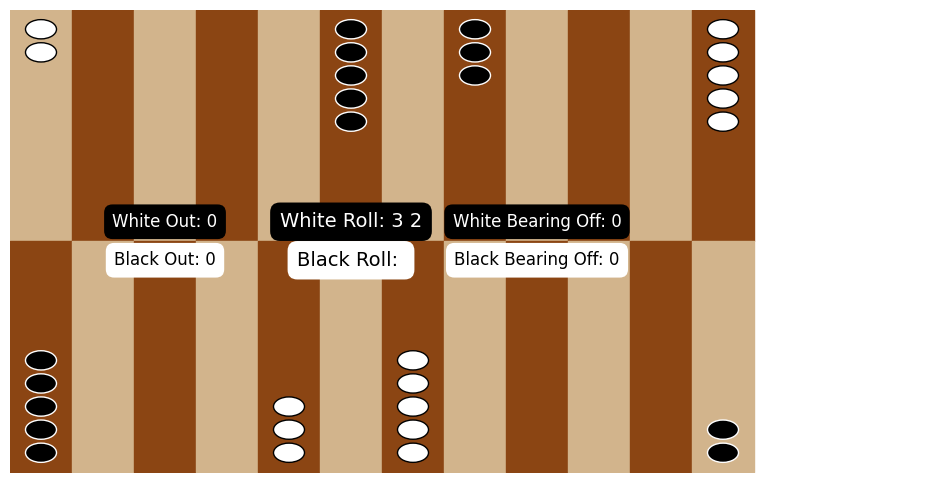

KeyboardInterrupt: 

In [9]:
def display_backgammon_board(board, ax, white_roll, black_roll):
    """
    Updates the backgammon board on the given Matplotlib axis, showing rolls and 'out' pieces.
    """
    ax.clear()  # Clear the axis for redrawing
    ax.set_xlim(0, 15)
    ax.set_ylim(0, 12)
    ax.axis('off')

    # Draw triangles for points
    for i in range(12):
        # Top triangles
        color = "tan" if i % 2 == 0 else "saddlebrown"
        ax.fill_between([i, i + 1], [6, 6], [12, 12], color=color)
        # Bottom triangles
        color = "saddlebrown" if i % 2 == 0 else "tan"
        ax.fill_between([i, i + 1], [6, 6], [0, 0], color=color)

    # Draw pieces
    for i, count in enumerate(board[BOARD_SPLICE]):  # Main points on the board
        x = i % 12 + 0.5  # Center of the triangle
        top = i < 12
        y_start = 11.5 if top else 0.5
        dy = -0.6 if top else 0.6

        for j in range(abs(count)):
            y = y_start + j * dy
            color = "white" if count > 0 else "black"
            edge_color = "black" if count > 0 else "white"
            ax.add_patch(plt.Circle((x, y), 0.25, color=color, ec=edge_color, lw=1))

    # Show "out" and "bearing off" counts in the center
    ax.text(2.5, 6.5, f"White Out: {board[WHITE_OUT]}", fontsize=12, ha="center", va="center", color="white", bbox=dict(facecolor="black", edgecolor="none", boxstyle="round,pad=0.5"))
    ax.text(2.5, 5.5, f"Black Out: {board[BLACK_OUT]}", fontsize=12, ha="center", va="center", color="black", bbox=dict(facecolor="white", edgecolor="none", boxstyle="round,pad=0.5"))
    ax.text(8.5, 6.5, f"White Bearing Off: {board[WHITE_BEARING]}", fontsize=12, ha="center", va="center", color="white", bbox=dict(facecolor="black", edgecolor="none", boxstyle="round,pad=0.5"))
    ax.text(8.5, 5.5, f"Black Bearing Off: {board[BLACK_BEARING]}", fontsize=12, ha="center", va="center", color="black", bbox=dict(facecolor="white", edgecolor="none", boxstyle="round,pad=0.5"))

    # Show dice rolls
    ax.text(5.5, 6.5, f"White Roll: {white_roll}", fontsize=14, ha="center", va="center", color="white", bbox=dict(facecolor="black", edgecolor="none", boxstyle="round,pad=0.5"))
    ax.text(5.5, 5.5, f"Black Roll: {black_roll}", fontsize=14, ha="center", va="center", color="black", bbox=dict(facecolor="white", edgecolor="none", boxstyle="round,pad=0.5"))

    plt.pause(0.1)  # Pause briefly to allow the figure to update


def main():

    fig, ax = plt.subplots(figsize=(12, 6))
    plt.ion()  # Enable interactive mode

    for turn in range(30):  # Simulate 10 turns
        
        white_roll = ""
        black_roll = ""
        if turn % 2 == 0:
            white_roll = " ".join(map(str, rolls[turn]))
        else: black_roll = " ".join(map(str, rolls[turn]))
        
        disp_board = boards[turn][:-1]

        display_backgammon_board(disp_board, ax, white_roll, black_roll)
        sleep(1)  # Pause to simulate time between turns

    plt.ioff()  # Disable interactive mode
    plt.show()  # Keep the final board displayed


main()

In [22]:
boards = [starting_board()] + boards

In [23]:
boards[0]

array([ 0,  2,  0,  0,  0,  0, -5,  0, -3,  0,  0,  0,  5, -5,  0,  0,  0,
        3,  0,  5,  0,  0,  0,  0, -2,  0,  0,  0,  1])

In [43]:
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
from time import sleep

def display_backgammon_board(board, ax, white_roll, black_roll):
    """
    Updates the backgammon board on the given Matplotlib axis, showing rolls and 'out' pieces.
    """
    ax.clear()  # Clear the axis for redrawing
    ax.axis('off')

    # Draw triangles for points
    for i in range(12):
        # Top triangles
        color = "tan" if i % 2 == 0 else "saddlebrown"
        ax.fill_between([i, i + 1], [6, 6], [12, 12], color=color)
        # Bottom triangles
        color = "saddlebrown" if i % 2 == 0 else "tan"
        ax.fill_between([i, i + 1], [6, 6], [0, 0], color=color)

    # Draw pieces
    for i, count in enumerate(board[BOARD_SPLICE]):  # Main points on the board
        x = i % 12 + 0.5  # Center of the triangle
        top = i < 12
        y_start = 11.5 if top else 0.5
        dy = -0.6 if top else 0.6

        for j in range(abs(count)):
            y = y_start + j * dy
            color = "white" if count < 0 else "black"
            edge_color = "black" if count < 0 else "white"
            ax.add_patch(plt.Circle((x, y), 0.25, color=color, ec=edge_color, lw=1))

    # Show "out" and "bearing off" counts in the center
    ax.text(1.5, 6.5, f"White Out: {board[WHITE_OUT]}", fontsize=10, ha="center", va="center", color="white", bbox=dict(facecolor="black", edgecolor="none", boxstyle="round,pad=0.5"))
    ax.text(1.5, 5.5, f"Black Out: {board[BLACK_OUT]}", fontsize=10, ha="center", va="center", color="black", bbox=dict(facecolor="white", edgecolor="none", boxstyle="round,pad=0.5"))
    ax.text(10.5, 6.5, f"W. Bearing: {board[WHITE_BEARING]}", fontsize=10, ha="center", va="center", color="white", bbox=dict(facecolor="black", edgecolor="none", boxstyle="round,pad=0.5"))
    ax.text(10.5, 5.5, f"B. Bearing: {board[BLACK_BEARING]}", fontsize=10, ha="center", va="center", color="black", bbox=dict(facecolor="white", edgecolor="none", boxstyle="round,pad=0.5"))

    # Show dice rolls
    ax.text(6, 6.5, f"White Roll: {white_roll}", fontsize=12, ha="center", va="center", color="white", bbox=dict(facecolor="black", edgecolor="none", boxstyle="round,pad=0.5"))
    ax.text(6, 5.5, f"Black Roll: {black_roll}", fontsize=12, ha="center", va="center", color="black", bbox=dict(facecolor="white", edgecolor="none", boxstyle="round,pad=0.5"))


def main():
    fig, ax = plt.subplots(figsize=(12, 6))

    for turn in range(30):  # Simulate 10 turns
        white_roll = ""
        black_roll = ""
        if turn % 2 == 0:
            white_roll = " ".join(map(str, rolls[turn]))
        else:
            black_roll = " ".join(map(str, rolls[turn]))

        disp_board = boards[turn][:-1]

        display_backgammon_board(disp_board, ax, white_roll, black_roll)
        display(fig)  # Display the updated figure
        clear_output(wait=True)  # Clear the previous output to update animation
        sleep(3)  # Pause to simulate time between turns

    plt.close(fig)  # Close the figure to prevent resource leakage


# main()

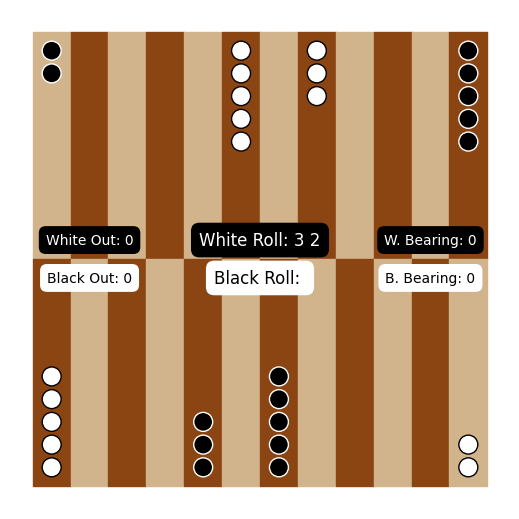

In [54]:
def update_frame(turn, boards, rolls, ax):

    white_roll = ""
    black_roll = ""
    if turn % 2 == 0:
        white_roll = " ".join(map(str, rolls[turn]))
    else:
        black_roll = " ".join(map(str, rolls[turn]))

    disp_board = boards[turn][:-1]

    display_backgammon_board(disp_board, ax, white_roll, black_roll)
    

fig, ax = plt.subplots(figsize=(12, 6))
fig.set_size_inches(5,5)
ax.set_axis_off() # You don't actually need this line as the saved figure will not include the labels, ticks, etc, but I like to include it
fig.subplots_adjust(left=0, bottom=0, right=1, top=1)
num_turns = len(boards)
rolls.append(rolls[0])

ani = FuncAnimation(
    fig,
    update_frame,
    frames=num_turns,
    fargs=(boards, rolls, ax),
    interval=1000,
    repeat=False
)

# Save as video
# ani.save("backgammon_animation.mp4", writer="ffmpeg", fps=1)

# Save as GIF
ani.save('images/backgammon_full_game_animation.gif', dpi=100, writer='pillow', fps=1)

In [55]:
rolls

[array([3, 2]),
 array([5, 4]),
 array([2, 4]),
 array([1, 6]),
 array([3, 4]),
 array([1, 5]),
 array([4, 5]),
 array([1, 6]),
 array([6, 6, 6, 6]),
 array([4, 3]),
 array([6, 2]),
 array([1, 5]),
 array([5, 3]),
 array([6, 1]),
 array([3, 3, 3, 3]),
 array([6, 5]),
 array([5, 3]),
 array([6, 2]),
 array([3, 1]),
 array([2, 4]),
 array([1, 3]),
 array([2, 5]),
 array([4, 4, 4, 4]),
 array([2, 4]),
 array([2, 3]),
 array([3, 4]),
 array([1, 1, 1, 1]),
 array([1, 2]),
 array([4, 2]),
 array([2, 5]),
 array([4, 3]),
 array([6, 1]),
 array([3, 6]),
 array([1, 6]),
 array([6, 2]),
 array([1, 5]),
 array([1, 6]),
 array([6, 2]),
 array([2, 4]),
 array([4, 4, 4, 4]),
 array([2, 3]),
 array([6, 5]),
 array([1, 4]),
 array([4, 2]),
 array([6, 1]),
 array([2, 6]),
 array([2, 5]),
 array([1, 6]),
 array([6, 5]),
 array([4, 3]),
 array([1, 3]),
 array([6, 6, 6, 6]),
 array([1, 5]),
 array([1, 4]),
 array([2, 5]),
 array([4, 3]),
 array([1, 5]),
 array([6, 1]),
 array([3, 2]),
 array([6, 1]),
 arr